In [1]:
# importa biblioteca pandas
import pandas as pd

# importa os dados
dados = pd.read_excel('compras4.xlsx')

In [3]:
# cálculo de associação para 2 elementos

def associacao(item1,item2):

    a_b = 0
    a = 0
    b = 0

    for itens in dados['compras']:
        if item1 in itens:
            if item2 in itens:
                a_b+=1
        if item1 in itens:
            a+=1
        if item2 in itens:
            b+=1

    # cálculo de suporte entre "a" e "b"
    suporte_a_b = a_b/len(dados)
    #print('suporte', item1, 'e', item2, '=', suporte_a_b)

    # cálculo de suporte de "a"
    suporte_a = a/len(dados)

    # cálculo de suporte de "b"
    suporte_b = b/len(dados)

    # cálculo de confiança de "a" e "b"
    confianca_a_b = suporte_a_b/suporte_a
    print('confiança', item1, 'e', item2, '=', confianca_a_b)
    return confianca_a_b
    print('confiança', item1, 'e', item2, '=', confianca_a_b)

    # cálculo de lift entre "a" e "b"
    lift = confianca_a_b/suporte_b

    

In [4]:
# escolhe a bebida para fazer o cálculo da função de associação
bebida_escolhida = 'vodka'
confianca_rum = round(associacao(bebida_escolhida,'rum'),2)
confianca_vinho = round(associacao(bebida_escolhida,'vinho'),2)
confianca_vodka = round(associacao(bebida_escolhida,'vodka'),2)
confianca_cachaca = round(associacao(bebida_escolhida, 'cachaca'),2)
confianca_tequila = round(associacao(bebida_escolhida, 'tequila'),2)
confianca_uisque = round(associacao(bebida_escolhida,'uisque'),2)
confianca_cerveja = round(associacao(bebida_escolhida,'cerveja'),2)

confiança vodka e rum = 0.33333333333333337
confiança vodka e vinho = 0.2
confiança vodka e vodka = 1.0
confiança vodka e cachaca = 0.3
confiança vodka e tequila = 0.1
confiança vodka e uisque = 0.26666666666666666
confiança vodka e cerveja = 0.5


{('rum', 'vodka'): 0.33, ('vinho', 'vodka'): 0.2, ('cachaca', 'vodka'): 0.3, ('tequila', 'vodka'): 0.1, ('uisque', 'vodka'): 0.27, ('cerveja', 'vodka'): 0.5}


{('rum',
  'vodka'): Text(0.8117448437619674, -0.39091579256102543, "{'weight': 0.33}"),
 ('vinho',
  'vodka'): Text(0.6234897471285783, -5.108969419742593e-08, "{'weight': 0.2}"),
 ('cachaca',
  'vodka'): Text(0.2004843856483429, 0.0965481460976223, "{'weight': 0.3}"),
 ('tequila',
  'vodka'): Text(-0.1387395567875362, -0.1739738901008736, "{'weight': 0.1}"),
 ('uisque',
  'vodka'): Text(-0.1387395567875362, -0.6078576652188556, "{'weight': 0.27}"),
 ('cerveja',
  'vodka'): Text(0.20048435584602126, -0.8783797312196732, "{'weight': 0.5}")}

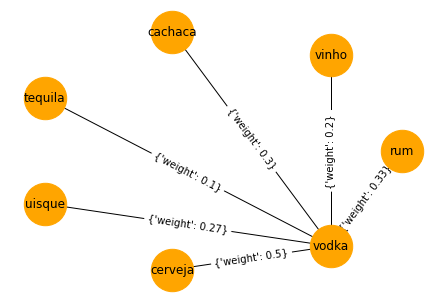

In [5]:
# criação do grafo
# importando bibliotecas para criação de grafos
import networkx as nx
G = nx.Graph()


# dicionário com valores de confiança das bebidas
Dic_bebidas = {}
Dic_bebidas['rum'] = confianca_rum
Dic_bebidas['vinho'] = confianca_vinho
Dic_bebidas['vodka'] = confianca_vodka
Dic_bebidas['cachaca'] = confianca_cachaca
Dic_bebidas['tequila'] = confianca_tequila
Dic_bebidas['uisque'] = confianca_uisque
Dic_bebidas['cerveja'] = confianca_cerveja


# definindo nodes
nodes = []

for bebida,confianca in Dic_bebidas.items():
    if bebida != bebida_escolhida:
        nodes.append(bebida)

# adicionando nodes no grafo
for node in nodes:
    G.add_node(node)

# adicionando vértices e pesos
for bebida,confianca in Dic_bebidas.items():
    if bebida != bebida_escolhida:
        G.add_edge(bebida_escolhida, bebida, weight=confianca)

# criando visualização do grafo
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1800, node_color='orange')
labels = nx.get_edge_attributes(G,'weight')
print(labels)
nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G))

In [6]:
# exemplo da bebida cerveja
# escolhe a bebida para fazer o cálculo da função de associação
bebida_escolhida = 'cerveja'
confianca_rum = round(associacao(bebida_escolhida,'rum'),2)
confianca_vinho = round(associacao(bebida_escolhida,'vinho'),2)
confianca_vodka = round(associacao(bebida_escolhida,'vodka'),2)
confianca_cachaca = round(associacao(bebida_escolhida, 'cachaca'),2)
confianca_tequila = round(associacao(bebida_escolhida, 'tequila'),2)
confianca_uisque = round(associacao(bebida_escolhida,'uisque'),2)
confianca_cerveja = round(associacao(bebida_escolhida,'cerveja'),2)

confiança cerveja e rum = 0.5
confiança cerveja e vinho = 0.35714285714285715
confiança cerveja e vodka = 0.26785714285714285
confiança cerveja e cachaca = 0.33928571428571425
confiança cerveja e tequila = 0.23214285714285712
confiança cerveja e uisque = 0.35714285714285715
confiança cerveja e cerveja = 1.0


{('rum', 'cerveja'): 0.5, ('vinho', 'cerveja'): 0.36, ('vodka', 'cerveja'): 0.27, ('cachaca', 'cerveja'): 0.34, ('tequila', 'cerveja'): 0.23, ('uisque', 'cerveja'): 0.36}


{('rum',
  'cerveja'): Text(0.8117448437619674, -0.39091579256102543, "{'weight': 0.5}"),
 ('vinho',
  'cerveja'): Text(0.6234897471285783, -5.108969419742593e-08, "{'weight': 0.36}"),
 ('vodka',
  'cerveja'): Text(0.2004843856483429, 0.0965481460976223, "{'weight': 0.27}"),
 ('cachaca',
  'cerveja'): Text(-0.1387395567875362, -0.1739738901008736, "{'weight': 0.34}"),
 ('tequila',
  'cerveja'): Text(-0.1387395567875362, -0.6078576652188556, "{'weight': 0.23}"),
 ('uisque',
  'cerveja'): Text(0.20048435584602126, -0.8783797312196732, "{'weight': 0.36}")}

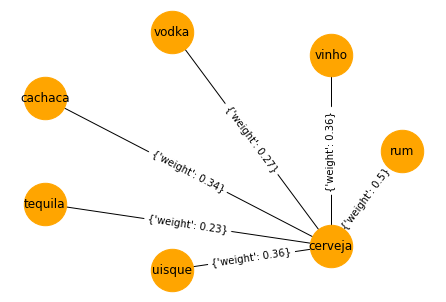

In [7]:
# importando bibliotecas para criação de grafos
import networkx as nx
G = nx.Graph()


# dicionário com valores de confiança das bebidas
Dic_bebidas = {}
Dic_bebidas['rum'] = confianca_rum
Dic_bebidas['vinho'] = confianca_vinho
Dic_bebidas['vodka'] = confianca_vodka
Dic_bebidas['cachaca'] = confianca_cachaca
Dic_bebidas['tequila'] = confianca_tequila
Dic_bebidas['uisque'] = confianca_uisque
Dic_bebidas['cerveja'] = confianca_cerveja


# definindo nodes
nodes = []

for bebida,confianca in Dic_bebidas.items():
    if bebida != bebida_escolhida:
        nodes.append(bebida)

# adicionando nodes no grafo
for node in nodes:
    G.add_node(node)

# adicionando vértices e pesos
for bebida,confianca in Dic_bebidas.items():
    if bebida != bebida_escolhida:
        G.add_edge(bebida_escolhida, bebida, weight=confianca)

# criando visualização do grafo
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1800, node_color='orange')
labels = nx.get_edge_attributes(G,'weight')
print(labels)
nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G))